# Bike rental

Information about the data set can be found [here](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset)

In [1]:
#First, let's import the nessecary labraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

df=pd.read_csv("./Files/Bike Rental UCI dataset.csv")
df.head()

,season,yr,mnth,hr,holiday,workingday,weathersit,temp,hum,windspeed,dayOfWeek,days,demand
0,1,0,1,0,0,0,1,0.24,0.81,0.0,Sat,0,16
1,1,0,1,1,0,0,1,0.22,0.80,0.0,Sat,0,40
2,1,0,1,2,0,0,1,0.22,0.80,0.0,Sat,0,32
3,1,0,1,3,0,0,1,0.24,0.75,0.0,Sat,0,13
4,1,0,1,4,0,0,1,0.24,0.75,0.0,Sat,0,1


The dataframe has 17379 rows and 13 columns. There is one columns of type object (text) <br>
temp, hum, windspeed are rescaled to 0-1 range

## Regression Model


In [2]:
for hour in df.hr.unique():
    col='is_'+str(hour)
    df[col]= df.hr == hour

y = df.demand
X = df.drop('demand',axis=1,inplace=False)
X.dayOfWeek = X.dayOfWeek.astype("category").cat.codes

from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

print  ('train r2 =', reg.score(X_train, y_train))
print  ('test r2 = ', reg.score(X_test, y_test))

from sklearn import cross_validation
scores_reg = cross_validation.cross_val_score(reg, X, y, scoring='r2', cv=5)
print('cross validation r2 =',scores_reg.mean())

train r2 = 0.675975519096
test r2 =  0.670532543359


C:\Users\Valentin\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


cross validation r2 = 0.527525688513


## Regression model's performance

'Done'

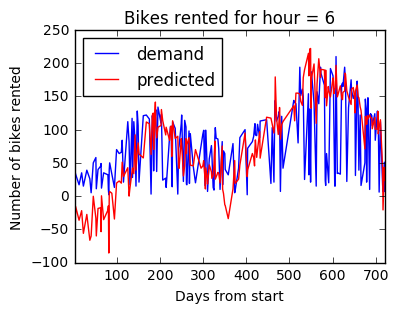

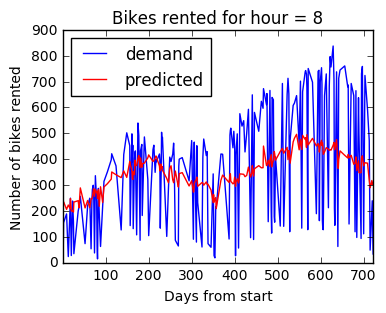

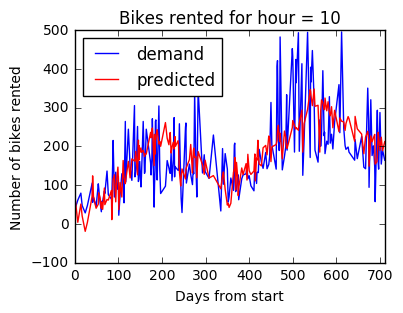

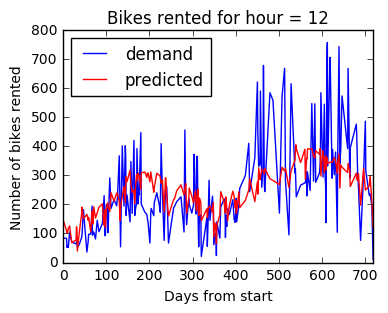

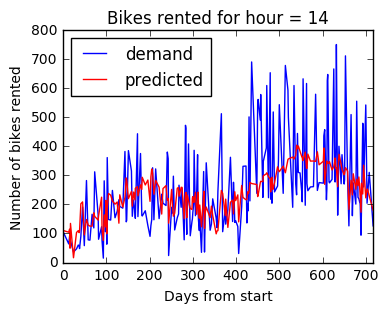

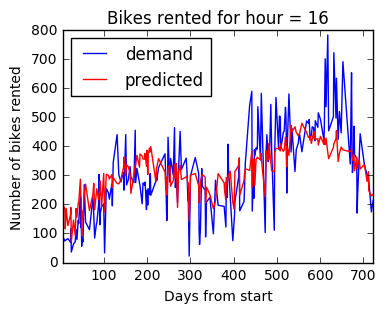

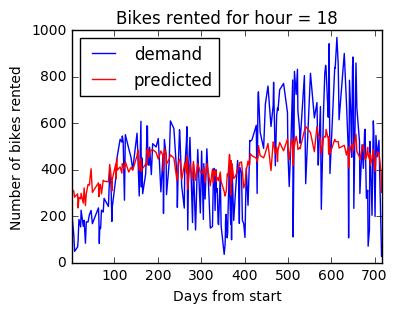

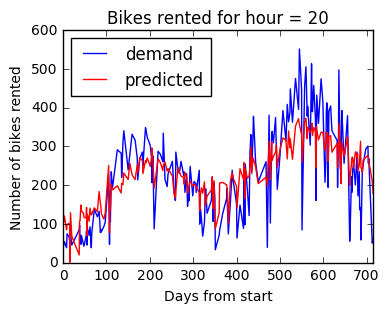

In [3]:
def ts_bikes(df, times):
    import matplotlib
    matplotlib.use('agg')  # Set backend
    import matplotlib.pyplot as plt
    for tm in times:
        fig = plt.figure(figsize=(4, 3))
        fig.clf()
        ax = fig.gca()
        df[df.hr == tm].plot(kind = 'line', 
                              x = 'days', y = 'demand', ax = ax)          
        df[df.hr == tm].plot(kind = 'line', 
                              x = 'days', y = 'predicted', color = 'red', ax = ax)                                    
        plt.xlabel("Days from start")
        plt.ylabel("Number of bikes rented")
        plt.title("Bikes rented for hour = " + str(tm))
        #fig.savefig('ts_' + str(tm) + '.png')
    return 'Done'

X_test['predicted']=reg.predict(X_test)
X_test['demand']=y_test
X_test.sort('days',inplace=True)
plt_times = [6, 8, 10, 12, 14, 16, 18, 20]
ts_bikes(X_test, plt_times)

Looks like the model is not doing a great job in fitting the demand for hours 8 and 18. Let's plot the reisuals for all hours

In [4]:
def resids(df):
    df['resids'] = df.predicted - df.demand
    return df        
        
def box_resids(df):
    import matplotlib
    matplotlib.use('agg')  # Set backend
    import matplotlib.pyplot as plt
    
    df = resids(df)
    
    fig = plt.figure(figsize=(10, 4))
    fig.clf()
    ax = fig.gca()  
    df.boxplot(column = ['resids'], by = ['hr'], ax = ax)   
    plt.xlabel('')
    plt.ylabel('Residuals')
    #fig.savefig('boxes' + '.png')
    return 'Done'

'Done'

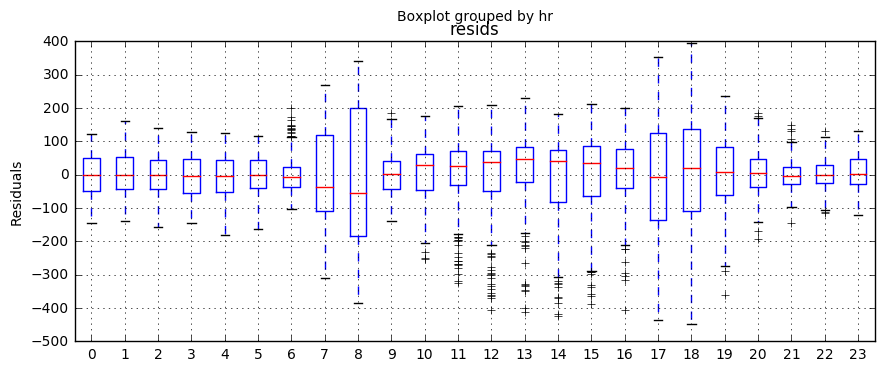

In [5]:
box_resids(X_test)

This is the regression model we have seen last time. Let's try to improve the 5-CV R2 of 0.527526650056. <br>


# Random Forest

In [6]:
# We split the dataset
y = df.demand
X = df.drop('demand',axis=1,inplace=False) 
X.dayOfWeek = X.dayOfWeek.astype("category").cat.codes # convert categorical into numerical

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)


In [7]:
# We create our model
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor(random_state=1)
reg_rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [8]:
print ('train accuracy =', reg_rf.score(X_train,y_train))
print ('test accuracy =',  reg_rf.score(X_test,y_test))

train accuracy = 0.988660049497
test accuracy = 0.942596699112


In [9]:
# We use cross validation
df.dayOfWeek = df.dayOfWeek.astype("category").cat.codes
predictors=list(X)
scores_rf = cross_validation.cross_val_score(reg_rf, df[predictors], df["demand"], scoring='r2', cv=5)
print('cross validation accuracy =', scores_rf.mean())


cross validation accuracy = 0.786631352383


In [10]:
print("The difference between cross validation and test is: +", reg_rf.score(X_test,y_test)-scores_rf.mean())
print("So the best model is the previous one")

The difference between cross validation and test is: + 0.155965346729
So the best model is the previous one


Let's visualize the model's performance. The code is provided below. If you are getting an error, check if you named your variables the same way as below.

'Done'

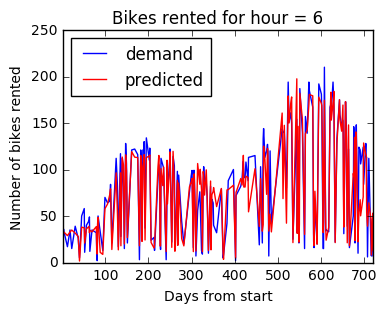

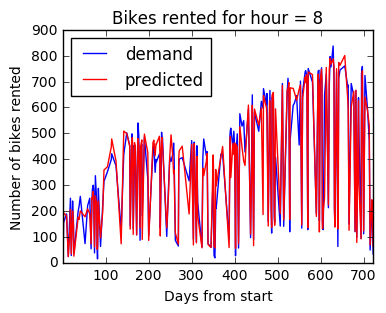

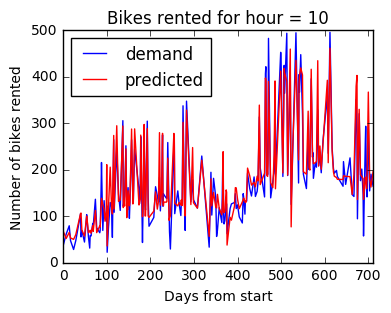

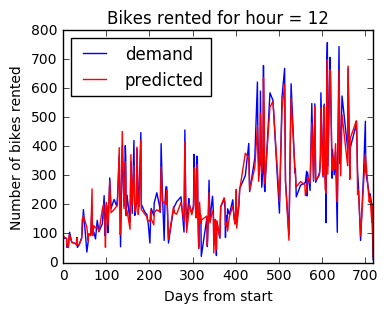

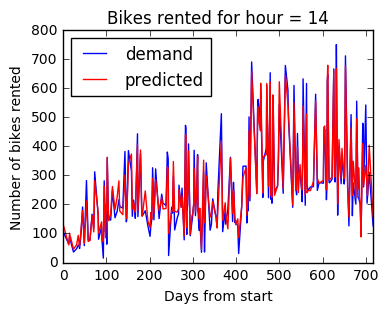

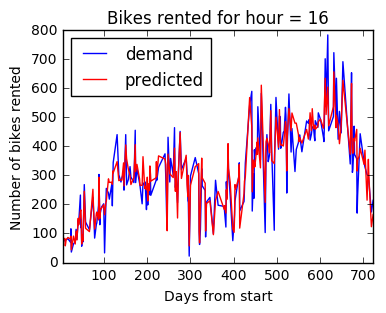

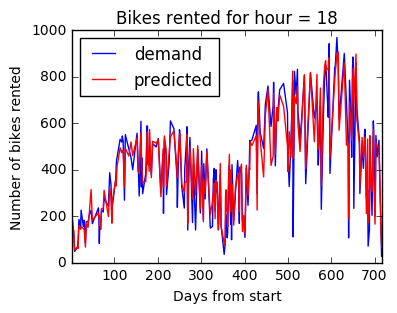

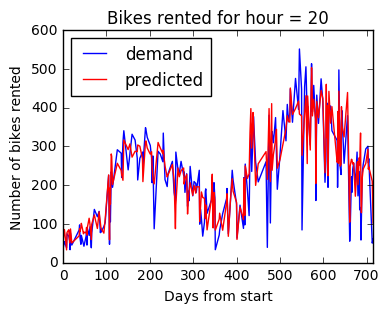

In [21]:
X_test['predicted']=reg_rf.predict(X_test)
X_test['demand']=y_test
X_test.sort('days',inplace=True)
ts_bikes(X_test, plt_times)

In [12]:
#box_resids(X_test)

The residuals are getting much smaller now.

In [13]:
# We optimise our parameters
from sklearn.model_selection  import GridSearchCV
params = {'min_samples_leaf':list([1, 4, 7]),'min_samples_split':list([2, 4, 6, 8, 10]),
          'n_estimators':list([20, 30, 40])}
clf_rf2=RandomForestRegressor(random_state=1)
clf_gs=GridSearchCV(clf_rf2, params, scoring = 'r2',cv=5)
clf_gs.fit(df[predictors], df["demand"])

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [20, 30, 40], 'min_samples_leaf': [1, 4, 7], 'min_samples_split': [2, 4, 6, 8, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=0)

In [14]:
clf_gs.best_score_

0.80284983678819222

In [15]:
clf_gs.best_params_

{'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 30}

In [16]:
# We use the best parameters to fit the best random forest regressor
y = df.demand
X = df.drop('demand',axis=1,inplace=False) 
X.dayOfWeek = X.dayOfWeek.astype("category").cat.codes # convert categorical into numerical
predictors=list(X)

from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

from sklearn.ensemble import RandomForestRegressor
clf_rf3 = RandomForestRegressor(random_state=1,min_samples_leaf= 1, min_samples_split= 8, n_estimators= 30) 
clf_rf3.fit(X_train, y_train)
scores_rf3 = cross_validation.cross_val_score(clf_rf3, df[predictors], df["demand"], scoring='r2', cv=5)
print ('train accuracy =', clf_rf3.score(X_train,y_train))
print ('test accuracy =',  clf_rf3.score(X_test,y_test))
print ('test score cross =',  scores_rf3.mean())

train accuracy = 0.979462237291
test accuracy = 0.947333070918
test score cross = 0.802854343849


In [17]:
# We print the deature importance
feat_imp = pd.DataFrame(clf_rf3.feature_importances_, predictors, columns=['Importance'])
feat_imp.sort('Importance', ascending=False)

,Importance
hr,4.931910e-01
days,1.665143e-01
temp,9.311936e-02
workingday,8.253051e-02
is_17,2.859194e-02
is_8,2.503461e-02
hum,2.392816e-02
is_18,2.051514e-02
weathersit,1.748255e-02
dayOfWeek,1.063015e-02


# Impovement of the model

In [18]:
from sklearn.model_selection  import GridSearchCV
params = {'min_samples_leaf':list([2, 4, 6]),'min_samples_split':list([2, 5, 7, 9, 11]),
          'n_estimators':list([30,40,50])}
clf_rf4=RandomForestRegressor(random_state=1)
# We want to find the best parameters
clf_gs3=GridSearchCV(clf_rf4, params, scoring = 'r2',cv=5)
clf_gs3.fit(df[predictors], df["demand"])


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [30, 40, 50], 'min_samples_leaf': [2, 4, 6], 'min_samples_split': [2, 5, 7, 9, 11]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=0)

In [19]:
print(clf_gs3.best_score_)
print(clf_gs3.best_params_)

0.803070036351
{'n_estimators': 40, 'min_samples_leaf': 2, 'min_samples_split': 5}


In [20]:
# We use the best params
clf_rf5 = RandomForestRegressor(random_state=1,min_samples_leaf= 2, min_samples_split= 5, n_estimators= 40) 
clf_rf5.fit(X_train, y_train)
scores_rf5 = cross_validation.cross_val_score(clf_rf5, df[predictors], df["demand"], scoring='r2', cv=5)
print ('train accuracy =', clf_rf5.score(X_train,y_train))
print ('test accuracy =',  clf_rf5.score(X_test,y_test))
print ('test score cross =',  scores_rf5.mean())

train accuracy = 0.98259047798
test accuracy = 0.947481293997
test score cross = 0.803074611166


We improved a bit our scores